In [58]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

import random
from sklearn.model_selection import train_test_split

%matplotlib inline

In [59]:
# set the seeds for reproducibility
random.seed(412)
np.random.seed(412)

# Generate Data for Regression

In [60]:
def mapping(x, slope, bias):
  y = slope * x + bias  # linear function
  return y


def generate_data(f, N, x_min, x_max):
  x_standard = np.random.rand(N, 1) # x values uniformly sampled from range [0, 1]
  x = x_standard * (x_max - x_min) + x_min   # carrying x values to the desired range [x_min, x_max]
  y = f(x) # compute y values from the underlying function f
  eps = 0.1 * np.random.randn(*y.shape)   # Gaussian noise with 0.1 standard deviation
  return x, y + eps   # return x's and corrupted f(x) values

In [61]:
### PARAMETERS FOR THE DATA GENERATION ###
slope, bias = 2.5, 0.5    # slope (w1) and bias (w0) of the linear component
x_min, x_max = 0.0, 1.0   # range of x values
N = 50                   # number of samples

# set the slope, bias parameters of the mapping() function; leave x
f = lambda x : mapping(x, slope=slope, bias=bias)

# generate N samples with function f, where the x is in range [x_min, x_max]
x, y = generate_data(f, N, x_min, x_max)
print('x.shape :', x.shape, ', y.shape :', y.shape)

x.shape : (50, 1) , y.shape : (50, 1)


### 50% Train 50% Validation Split

In [62]:
# Partition the dataset into train and test datasets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.5, shuffle=False)

# Make a scatter plot of the data

In [63]:
def plot_samples(train_data, val_data=None):
  fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

  x_train, y_train = train_data
  ax.scatter(x_train, y_train, label='train samples')
  if val_data:
    x_val, y_val = val_data
    ax.scatter(x_val, y_val, label='val samples')

  ax.set_xlim([-0.05, 1.05])  # need to change
  ax.set_ylim([-0.05, 3.55])  # need to change
  ax.set_xlabel('x', fontsize=12)
  ax.set_ylabel('f(x)', fontsize=12)
  ax.set_title('Simulated Nonlinear Data')
  ax.legend(loc='lower right')
  return fig, ax

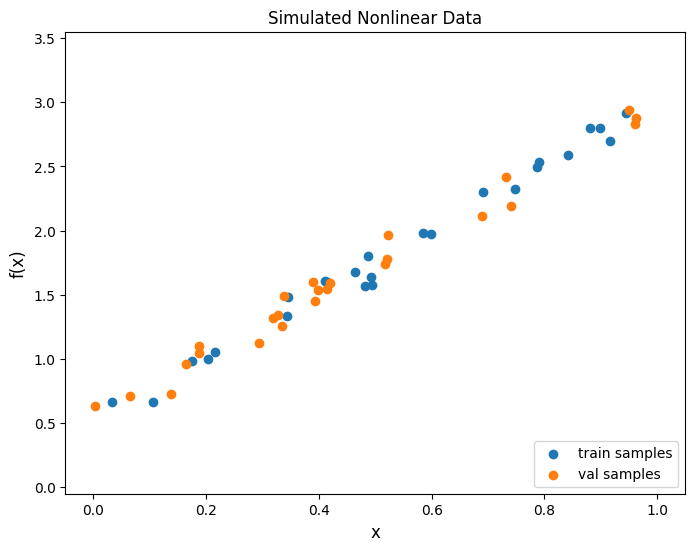

In [64]:
# Plot train and test datasets
fig, ax = plot_samples(train_data=(x_train, y_train), val_data=(x_val, y_val))

# Function for plotting the MSE loss
This function is defined to plot the Mean Squared Error loss across training iterations.
Ensure this function is executed before it is called in subsequent cells of this notebook.

In [65]:
def plot_mse_loss(mse_values):
  plt.figure(figsize=(10, 6))
  plt.plot(mse_values, label='MSE per Iteration')
  plt.xlabel('Iteration')
  plt.ylabel('Mean Squared Error')
  plt.title('MSE During Training')
  plt.legend()
  plt.show()

In [66]:
del x, y, x_train, y_train, x_val, y_val # I am deleting the variables so that you can start from scratch



Exploring different regression techniques and their applications using sklearn and NumPy libraries. Dataset has a **linear** relationship between the input variable (**x**) and the target variable (**y**), and use linear regression to model this relationship.

First, let's generate Dataset 1:



In [67]:
# use the generate_data function to get x, y. Do not change N, x_min, and x_max
# split the data to train and validation sets 50%-50% <-- after splitting, you can add a print statement to check the data shapes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generating Dataset 1 using the given function
N, x_min, x_max = 50, 0.0, 1.0  # Number of samples and range
x, y = generate_data(f, N, x_min, x_max)

# Splitting the data into training and validation sets (50%-50%)
X_train, X_val, y_train, y_val = train_test_split(x,y, test_size=0.5, random_state=412)

# Printing data shapes for verification
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (25, 1) (25, 1)
Validation set shape: (25, 1) (25, 1)


# Part 1.a

Our objective in Part 1.a is to use sklearn's linear regression model on Dataset 1. The main steps are as follows:  

1.   Initialize the model
2.   Fit it to the data
3.   Make predictions on the validation set

Then, we will evaluate the performance of the model on the validation set using the **mean squared error (MSE)** metric and print the result.

In [68]:
# import the linear regression model from the sklearn.linear_model module.
# import the mean squared error function from sklearn.metrics

# find the model's predictions on the validation set

# evaluate the model's performance on the validation set using mean squared error (MSE)
# print the model's mean squared error using this--> print('MSE of sklearn model: ', mse_sklearn)

# Import necessary libraries


# Initialize the Linear Regression model
model_lin = LinearRegression()

# Fit the model to the training data
model_lin.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model_lin.predict(X_val)

# Compute the Mean Squared Error (MSE)
mse_sklearn = mean_squared_error(y_val, y_pred)


print('MSE of sklearn model: ', mse_sklearn)


MSE of sklearn model:  0.00783350879057821


Next, we'll visualize the linear regression model's fit to Dataset 1 by drawing the **regression line** onto a scatter plot of the train and validation samples. To do this:

1.   Make a scatter plot of train and validation samples using the **plot_samples()** function.
2.   Draw the regression line onto this plot by following the directions in the comments.

By looking at the plot, we can get an idea of how well the linear regression model fits the data.

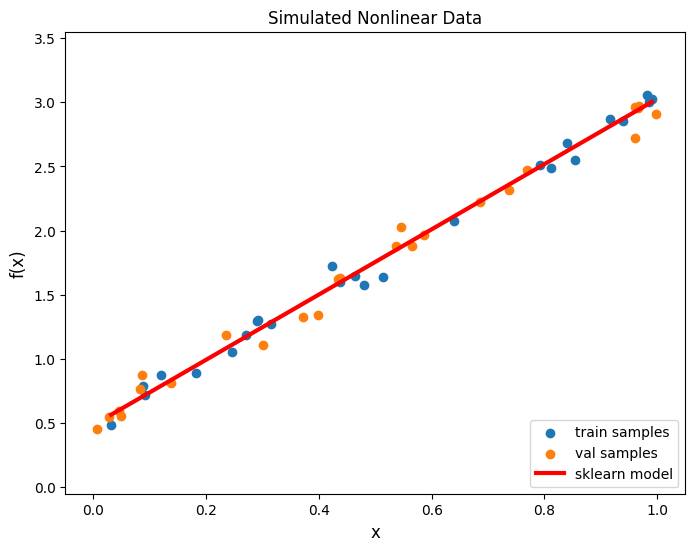

In [69]:
# Make a scatter plot of train and validation samples using the plot_samples() function
fig, ax = plot_samples((X_train, y_train), (X_val, y_val))

# Generating x_grid for the regression line
x_grid = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)  # Ensure correct range

# Use the model's predict() function on x_grid to find y_grid
y_grid = model_lin.predict(x_grid)

# Draw the regression line
ax.plot(x_grid, y_grid, color='red', linewidth=3, label='sklearn model')

# Adding legend and display the figure
ax.legend(loc='lower right')
#display(fig)  # Uncomment if the plot doesn't appear


Great! Now you know how to find the regression coefficients using the sklearn's linear regression model, and how to plot the regression line. Let's proceed to **Part 1.b**

# Part 1.b

In this part, we will use the pseudo-inverse solution manually to find the optimal regression coefficients. The main steps are as follows:

1.   Constructing the extended data matrix **X** that includes a column of ones for the bias (intercept) term.
2.   Taking the pseudo-inverse (pinv) of **X**.
3.   Finding regression coefficients **w** by using the equation **w** = pinv(**X**) * **y**.

*(Note that pinv(**X**) is a 2 x N matrix and **y** is an N x 1 vector. As a result, **w** has dimensions 2 x 1)*

In [70]:
from numpy.linalg import pinv
''' In the next two lines, construct the extended data matrices for training and validation,
by adding a column of ones to the original data matrix. For this, you can use np.concatenate()
function with the option axis=1. See the function documentation for further information'''
# 1. construct the extended data matrix for train
# 2. construct the extended data matrix for val
X_train_extended = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)
X_valid_extended = np.concatenate([np.ones((X_val.shape[0], 1)), X_val], axis=1)
# print the shapes of the extended data matrices, just to check
print("Extended X_train shape:", X_train_extended.shape)
print("Extended X_valid shape:", X_valid_extended.shape)
# 3.1. find the pseudoinverse (pinv) of the extended data matrix
X_pinv = pinv(X_train_extended)
# 3.2. perform the matrix multiplication pinv(X_extended) * y to find regression coefficients (w) ## look up np.matmul() function
w = np.matmul(X_pinv, y_train)
# find the models prediction on validation set
y_pred_manual = np.matmul(X_valid_extended, w)
# evaluate the model's performance on the validation set using mean squared error (MSE)
mse_man = mean_squared_error(y_val, y_pred_manual)
# print the model's mean squared error using this --> print('MSE of manual model: ', mse)
print('MSE of manual model: ', mse_man)

Extended X_train shape: (25, 2)
Extended X_valid shape: (25, 2)
MSE of manual model:  0.007833508790578236


Now that you have implemented your own linear regression algorithm and found the regression coefficients, let's visualize the results.

We will follow similar steps as in **Part 1.a** to draw the regression line found by your implementation onto the scatter plot of Dataset 1. Please follow the directives in the comments for details.

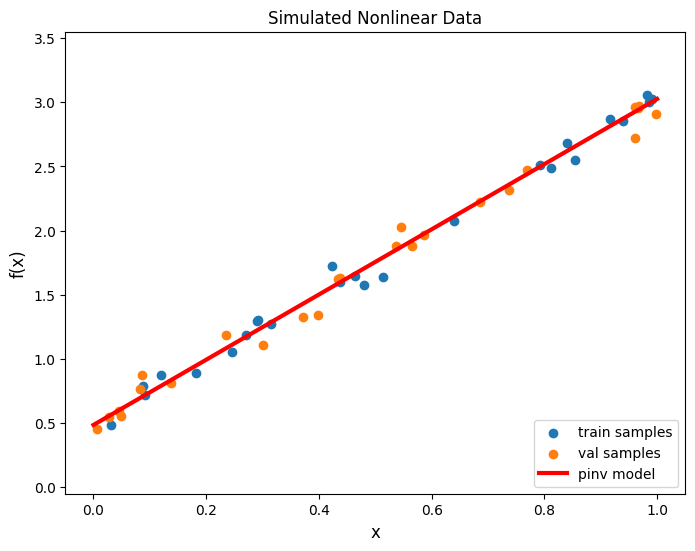

In [71]:
# make a scatter plot of the data in the line below using plot_samples() function using both train and val sets
fig, ax = plot_samples((X_train, y_train), (X_val, y_val)) # uncomment this line after filling in the parantheses, just like we did above

x_grid = np.linspace(x_min, x_max, 100)[..., np.newaxis] # do not change anything in this line

# first, construct the extended version of x_grid, just like you did to train and validation data matrices
x_grid_extended = np.concatenate([np.ones((x_grid.shape[0], 1)), x_grid], axis=1)

# now, using the regression coefficients, find the model's predictions (y_grid = Xw)
y_grid = np.matmul(x_grid_extended, w)


ax.plot(x_grid, y_grid, color='red', linewidth=3, label='pinv model') # uncomment this line after obtaining y_grid

ax.legend(loc='lower right') # uncomment this line too
# display(fig) # uncomment this line if the plot doesn't appear

Now you also know how to find the regression coefficients manually using the pseudoinverse method. In the last piece of **Part 1**, we're going to find the regression via gradient descent (GD) method. Let's proceed:

# Part 1.c

In this part, we're going to implement gradient descent optimization algorithm to find regression coefficients in an iterative manner. Starting with initial regression coefficients, we're going to take small steps in directions which minimizes the mean squared error. The main steps of the algorithm are as follows:


0.   Make sure that your extended data matrices (computed in **Part 1.b**) have dimensions of (N x 2), where N is variable. We don't care about what N is, but the second dimension must be two!
1.   Initialize the regression coefficients (i.e., weights **w**) with some values, usually random or zero.
2.   Choose a step size (i.e., learning rate **lr**) which determines the size of the steps we take in the direction of minimizing the cost function (**MSE**).
3.   Repeat the following steps for **M** steps:

     1.   Compute the predicted values using the current regression coefficients and input data:
        **y_pred** = **X** * **w**
        
        *Note that **X** * **w** is matrix multiplication of **X** and **w**.*
     2.   Compute the difference between predicted and actual values (i.e., the error):
        **pred_error** = **e** = (**y_pred** - **y**)
     3.   Compute the gradient of the cost function with respect to the regression coefficients:
        **w_grad** = (transpose(**X**) * **e**) / **N**

        *Note that transpose(**X**) * **e** is matrix multiplication of transpose(**X**) and **e**, and **N** is the number of samples.*
     4.   Update the regression coefficients by subtracting the gradient times the learning rate from the current coefficients.
     
        (**w** = **w** - **w_grad** * **lr**)
     5.   Calculate the new value of the cost function (**MSE**) using the updated regression coefficients **w** and input data **X**.

4.   Return the final regression coefficients.

**Additional Info**

**X** is an N x 2 matrix. **y** is an N x 1 column vector. **w** is a 2 x 1 column vector. As a result of the matrix multiplication, **y_pred** = **X** * **w** should also have dimensions of N x 1, same with **y** !

transpose(**X**) has dimensions of 2 x N. Similarly, the matrix multiplication transpose(**X**) * **e** yields **w_grad** with dimensions 2 x 1, same with **w** !

These values are here for you to check yourself while writing your code. While developing your code, use the **shape** property of your numpy arrays sparingly!

In [72]:
M = 1000  # Number of iterations
lr = 0.1  # Learning rate
mse_values = []  # Keep track of MSE loss

# Initialize regression coefficients correctly (2,1) dimensions
w_grad = np.zeros((2, 1))  # Use zeros for stability (you can also try np.random.randn(2, 1))

# Gradient Descent Loop
for i in range(M):
    # 1. Compute predictions using the current weights
    y_pred_grad = np.matmul(X_train_extended, w_grad)

    # 2. Compute error between prediction and actual values
    error = y_pred_grad - y_train  # Ensure correct dataset is used

    # 3. Compute the gradient
    gd = np.matmul(X_train_extended.T, error) / X_train_extended.shape[0]

    # 4. Update weights using gradient descent
    w_grad -= lr * gd

    # 5. Compute and store Mean Squared Error (MSE)
    mse_gd = mean_squared_error(y_train, y_pred_grad)
    mse_values.append(mse_gd)

    # 6. Print MSE at specific intervals
    if (i == 0) or ((i + 1) % 100 == 0):
        print('MSE error at step {}: {:.4f}'.format(i + 1, mse_gd))

MSE error at step 1: 3.9300
MSE error at step 100: 0.0693
MSE error at step 200: 0.0184
MSE error at step 300: 0.0081
MSE error at step 400: 0.0060
MSE error at step 500: 0.0055
MSE error at step 600: 0.0054
MSE error at step 700: 0.0054
MSE error at step 800: 0.0054
MSE error at step 900: 0.0054
MSE error at step 1000: 0.0054


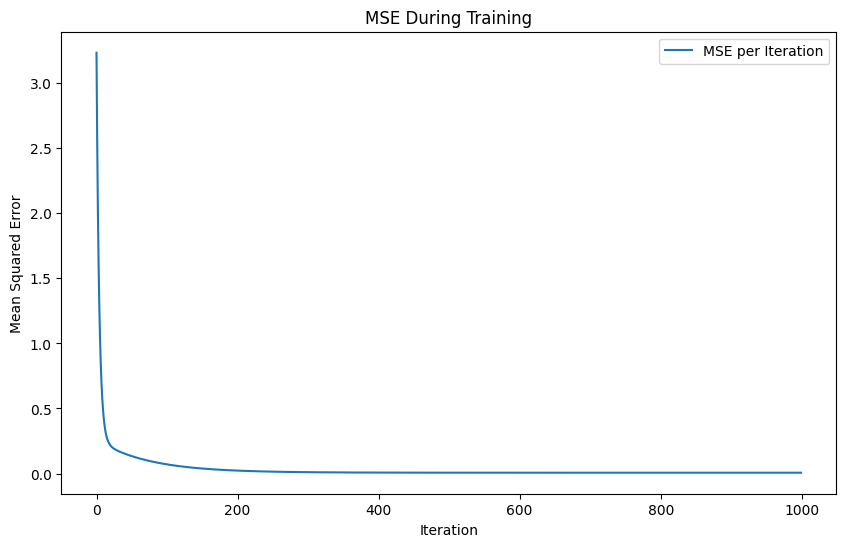

In [43]:
# now call the plot_mse_loss() function to lot the MSE loss.
plot_mse_loss(mse_values) # uncomment this with the appropriate parameters.

Now, we'll draw the regression line found by your implementation onto the scatter plot of Dataset 1. For that, we're going to:

1.   Make a scatter plot of train and validation samples using plot_samples() function.
2.   Draw the regression line onto this plot by following the directions in the comments.

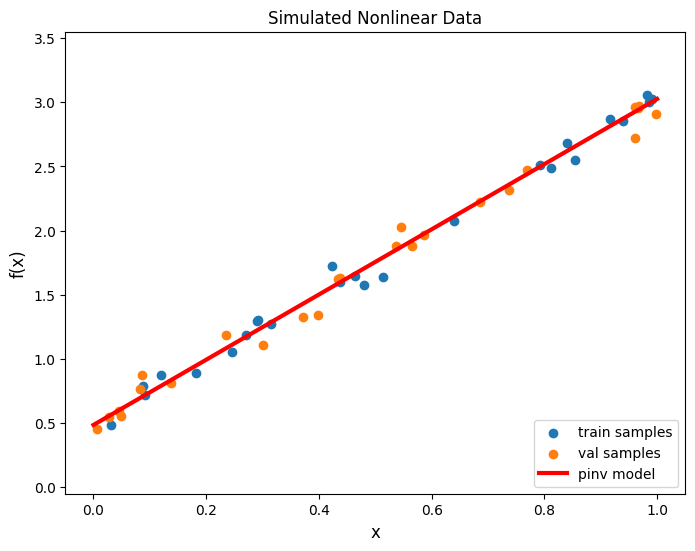

In [73]:
# make a scatter plot of the data in the line below using plot_samples() function using both train and val sets
fig, ax = plot_samples((X_train, y_train), (X_val, y_val)) # uncomment this line after filling in the parantheses, just like we did above

x_grid = np.linspace(x_min, x_max, 100)[..., np.newaxis] # do not change anything in this line
# first, construct the extended version of x_grid, just like you did to train and validation data matrices
x_grid_extended = np.concatenate([np.ones((x_grid.shape[0], 1)), x_grid], axis=1)
# now, using the regression coefficients, find the model's predictions (y_grid = Xw)
y_grid_gd = np.matmul(x_grid_extended, w_grad)
ax.plot(x_grid, y_grid, color='red', linewidth=3, label='pinv model') # uncomment this line after obtaining y_grid
ax.legend(loc='lower right') # uncomment this line too
# display(fig) # uncomment this line if the plot doesn't appear

# Part 2 - Data Generation

In Part 2 , we are moving from **Dataset 1** which has a **linear** relationship between the input variable (**x**) and the target variable (**y**), to **Dataset 2** which has a **non-linear** relationship between **x** and **y**, requiring the use of non-linear regression techniques to model the relationship, such as polynomial regression.

In this part, we are going to load the data from an **.npy** file, which is a file format used to store numerical data in Python, optimized for use with the NumPy library.

In [74]:
import numpy as np
from sklearn.model_selection import train_test_split

# Load Dataset 2 from .npy files
X = np.load('dataset2_data.npy')
y = np.load('dataset2_labels.npy')

# Split the data into 50% training and 50% validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.5, random_state=42)

# Print data shapes for verification
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)


Training set shape: (25, 1) (25, 1)
Validation set shape: (25, 1) (25, 1)



# Part 2.a

Our objective in Part 2.a is to use the sklearn library for performing linear regression on **polynomial features**. To do this,

1.   We'll use **PolynomialFeatures** from the **sklearn.preprocessing** module to expand our input data matrix **X** with polynomial features.
2.   Then, we'll use **LinearRegression** from **sklearn.linear_model** to fit the model to X.
3.   Make predictions on the validation set.

We'll evaluate the model's performance on the validation set using the **mean squared error (MSE)** metric and print the result.

Try polynomial degrees of 1, 3, 5, and 7 and comment on the best model in your report.



In [75]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Defining polynomial degrees to try
degrees = [1, 3, 5, 7]

# Iterating over different polynomial degrees
for order in degrees:
    print(f" Polynomial Degree: {order} ")

    # Construct polynomial features of degree "order"
    poly = PolynomialFeatures(degree=order)

    # Fit and transform training data
    X_train_poly = poly.fit_transform(X_train)

    # Transform validation data
    X_valid_poly = poly.transform(X_valid)

    # Initialize and fit the linear regression model
    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)

    # Making predictions on the validation set
    y_pred_poly = model_poly.predict(X_valid_poly)

    # Evaluate the model using Mean Squared Error (MSE)
    mse_sklearn_polynomial = mean_squared_error(y_valid, y_pred_poly)

    # Printing the MSE result for the current polynomial degree
    print('MSE of sklearn model:', mse_sklearn_polynomial)


 Polynomial Degree: 1 
MSE of sklearn model: 0.05830097537046252
 Polynomial Degree: 3 
MSE of sklearn model: 0.009619587973839388
 Polynomial Degree: 5 
MSE of sklearn model: 0.010278583809366295
 Polynomial Degree: 7 
MSE of sklearn model: 0.010116792111851689


Now we're moving on to the plot. This part is similar to the previous ones, but be careful to pick up small differences.

By looking at the plot, we can get an idea of how well the polynomial regression model fits the data.

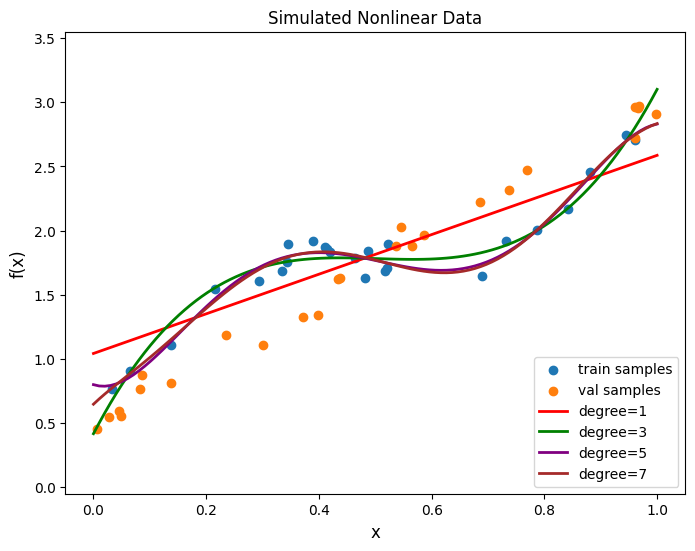

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Define polynomial degrees to visualize
degrees = [1, 3, 5, 7]

# Create a scatter plot using plot_samples()
fig, ax = plot_samples((X_train, y_train), (X_val, y_val))

# Generate x_grid for smoother curve plotting
x_grid = np.linspace(x_min, x_max, 100)[..., np.newaxis]


for order in degrees:
    # Construct polynomial features for the current degree
    poly = PolynomialFeatures(degree=order)

    # Transform training and x_grid data
    X_train_poly = poly.fit_transform(X_train)
    x_grid_poly = poly.transform(x_grid)

    # Training the polynomial regression model
    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)

    # Predicting y_grid values
    y_grid = model_poly.predict(x_grid_poly)

    # Assigning unique colors to each degree
    color_map = {1: 'red', 3: 'green', 5: 'purple', 7: 'brown'}


    ax.plot(x_grid, y_grid, color=color_map[order], linewidth=2, label=f'degree={order}')

#legend and display the figure
ax.legend(loc='lower right')
#display(fig)


# Part 2.b

In this part, we will implement our own polynomial regression algorithm to find the optimal regression coefficients. The main steps are as follows:

1.   Choose the degree of the polynomial regression as **3**. Above, you were asked to vary this and choose the best model (best polynomial degree) according to validation set; however in this part the aim is just to learn the implementation.
2.   Constructing the data matrix **X** that includes a column of ones for the bias (intercept) term.
3.   Taking the pseudo-inverse (pinv) of **X**.
4.   Finding regression coefficients **w** by using the equation **w** = pinv(**X**) * **y**.

*(Note that pinv(**X**) is a (degree+1) x N matrix and **y** is an N x 1 vector. As a result, **w** has dimensions (degree+1) x 1)*

.

.

.

**Illustration for Step 2 of algorithm (for degree 3)**

From $\quad x = \begin{bmatrix}
x_1 \\ x_2\\ \vdots \\ x_N \\
\end{bmatrix}$, we want to obtain $\quad X = \begin{bmatrix}
1 & x_1 & x_1^2 & x_1^3 \\
1 & x_2 & x_2^2 & x_2^3 \\
\vdots & \vdots & \vdots & \vdots \\
1 & x_N & x_N^2 & x_N^3 \\
\end{bmatrix}$.


where N is the number of samples (in either train or val dataset), and each column holds a power of **x**, starting from 0-th power in the first column, till the **degree** you specified.

In [77]:
from numpy.linalg import pinv
''' In the next two lines, construct the data matrices containing polynomial features for training and validation,
by adding columns of powers of the original data vector. For this, you can use np.concatenate()
function with the option axis=1. See the function documentation for further information'''
# Define polynomial degree as 3 stated for HW
degree = 3

# Construct the data matrix for training (Adding polynomial features manually)
X_train_manual = np.concatenate([X_train**i for i in range(degree + 1)], axis=1)

# Construct the data matrix for validation (Using the same transformation)
X_valid_manual = np.concatenate([X_valid**i for i in range(degree + 1)], axis=1)

# Print shapes of data matrices for verification
print("Training data shape:", X_train_manual.shape)
print("Validation data shape:", X_valid_manual.shape)

# Compute the pseudo-inverse (pinv) of the training data matrix
X_pinv = pinv(X_train_manual)

# Compute regression coefficients w using w = pinv(X) * y
w_manual = np.matmul(X_pinv, y_train)

# Make predictions on the validation set
y_pred_manual = np.matmul(X_valid_manual, w_manual)

# Evaluate the model using Mean Squared Error (MSE)
mse_manual = mean_squared_error(y_valid, y_pred_manual)

# Print the model's Mean Squared Error
print('MSE of manual polynomial regression model:', mse_manual)

Training data shape: (25, 4)
Validation data shape: (25, 4)
MSE of manual polynomial regression model: 0.009619587973839425


Make a plot

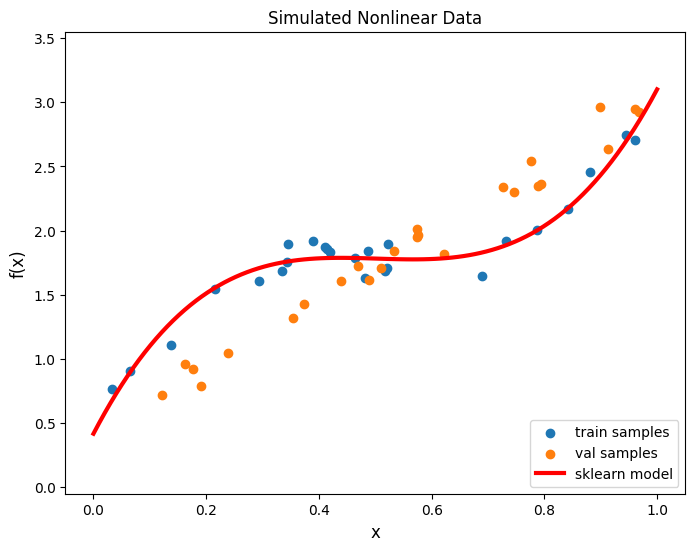

In [57]:
# make a scatter plot of the data in the line below using plot_samples() function using both train and val sets

fig, ax = plot_samples((X_train, y_train), (X_val, y_val))
x_grid = np.linspace(x_min, x_max, 100)[..., np.newaxis] # do not change anything in this line
# transform the x_grid the same way you transformed the train and val vectors.
x_grid_manual = np.concatenate([x_grid**i for i in range(degree + 1)], axis=1)

# now, using the regression coefficients, find the model's predictions (y_grid = Xw)
y_grid = np.matmul(x_grid_manual, w_manual)
ax.plot(x_grid, y_grid, color='red', linewidth=3, label='sklearn model') # uncomment this line after obtaining y_grid
ax.legend(loc='lower right') # uncomment this line too
# display(fig) # uncomment this line if the plot doesn't appear